# Identification of an electromechanical system using Entropic Regression

Example created by Wilson Rocha Lacerda Junior

More details about this data can be found in the following paper (in Portuguese): https://www.researchgate.net/publication/320418710_Identificacao_de_um_motorgerador_CC_por_meio_de_modelos_polinomiais_autorregressivos_e_redes_neurais_artificiais

In [ ]:
pip install sysidentpy

In [1]:
import numpy as np
import pandas as pd
from sysidentpy.model_structure_selection import ER
from sysidentpy.basis_function._basis_function import Polynomial
from sysidentpy.parameter_estimation import RecursiveLeastSquares
from sysidentpy.metrics import root_relative_squared_error
from sysidentpy.utils.display_results import results
from sysidentpy.utils.plotting import plot_residues_correlation, plot_results
from sysidentpy.residues.residues_correlation import (
    compute_residues_autocorrelation,
    compute_cross_correlation,
)

In [2]:
df1 = pd.read_csv("../examples/datasets/x_cc.csv")
df2 = pd.read_csv("../examples/datasets/y_cc.csv")

<Axes: >

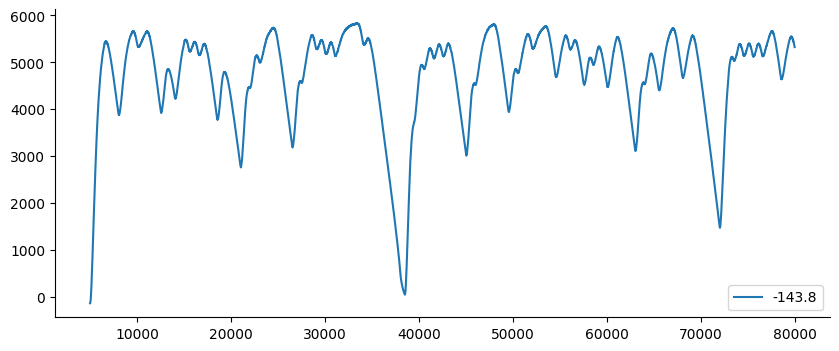

In [3]:
df2[5000:80000].plot(figsize=(10, 4))

In [4]:
# we will decimate the data using d=500 in this example
x_train, x_valid = np.split(df1.iloc[::500].values, 2)
y_train, y_valid = np.split(df2.iloc[::500].values, 2)

## Building a Polynomial NARX model using Entropic Regression Algorithm

In [5]:
basis_function = Polynomial(degree=2)
estimator = RecursiveLeastSquares()

model = ER(
    ylag=6,
    xlag=6,
    n_perm=2,
    k=2,
    skip_forward=True,
    estimator=estimator,
    basis_function=basis_function,
)

C:\Users\wilso\Desktop\projects\GitHub\sysidentpy\sysidentpy\utils\deprecation.py:40: FutureWarning: Passing a string to define the estimator will rise an error in v0.4.0. 
 You'll have to use ER(estimator=LeastSquares()) instead. 
 The only change is that you'll have to define the estimator first instead of passing a string like 'least_squares'. 
 This change will make easier to implement new estimators and it'll improve code readability.
  warnings.warn(message, FutureWarning, stacklevel=1)


C:\Users\wilso\AppData\Local\Temp\ipykernel_20912\4260657624.py:1: UserWarning: Given the higher number of possible regressors (91), the Entropic Regression algorithm may take long time to run. Consider reducing the number of regressors 
  model.fit(X=x_train, y=y_train)


0.03276775133089435
        Regressors   Parameters             ERR
0                1  -6.7052E+02  0.00000000E+00
1           y(k-1)   9.6022E-01  0.00000000E+00
2           y(k-5)  -3.0769E-02  0.00000000E+00
3          x1(k-2)   7.3733E+02  0.00000000E+00
4         y(k-1)^2   1.5897E-04  0.00000000E+00
5     y(k-2)y(k-1)  -2.2080E-04  0.00000000E+00
6     y(k-3)y(k-1)   2.9946E-06  0.00000000E+00
7     y(k-5)y(k-1)   4.9779E-06  0.00000000E+00
8    x1(k-1)y(k-1)  -1.7036E-01  0.00000000E+00
9    x1(k-2)y(k-1)  -2.0748E-01  0.00000000E+00
10   x1(k-4)y(k-1)   8.3724E-03  0.00000000E+00
11        y(k-2)^2   7.3635E-05  0.00000000E+00
12   x1(k-1)y(k-2)   1.2028E-01  0.00000000E+00
13   x1(k-2)y(k-2)   8.0270E-02  0.00000000E+00
14   x1(k-3)y(k-2)  -3.0208E-03  0.00000000E+00
15   x1(k-4)y(k-2)  -8.8307E-03  0.00000000E+00
16   x1(k-1)y(k-3)  -4.9095E-02  0.00000000E+00
17   x1(k-1)y(k-4)   1.2375E-02  0.00000000E+00
18       x1(k-1)^2   1.1682E+02  0.00000000E+00
19  x1(k-3)x1(k-2)  

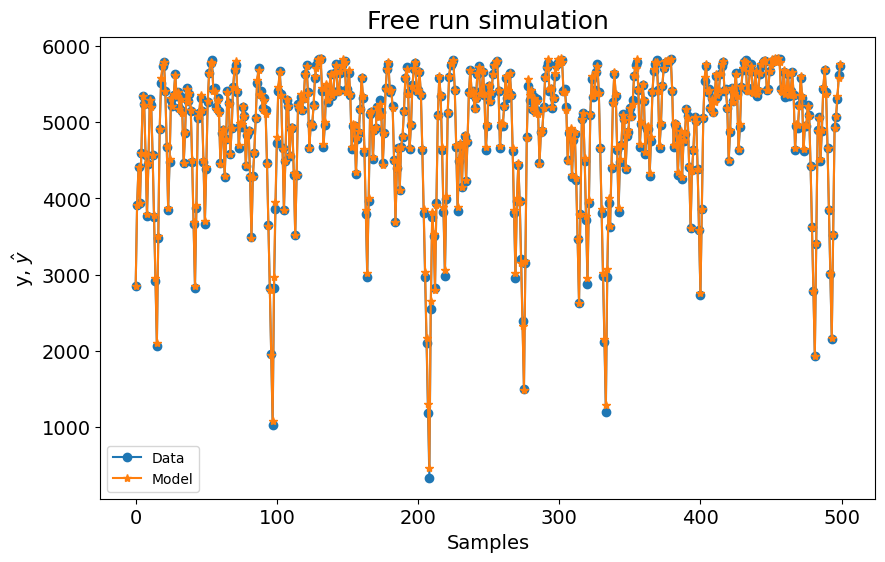

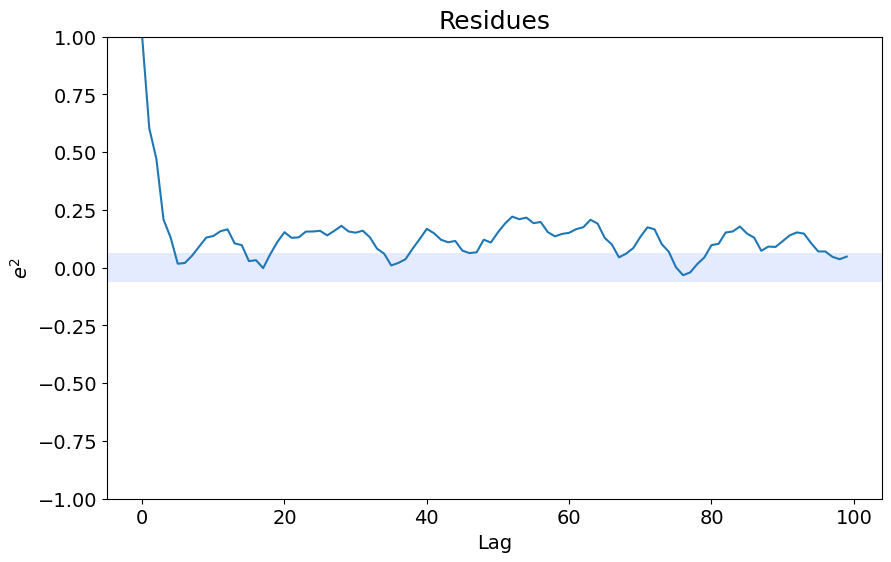

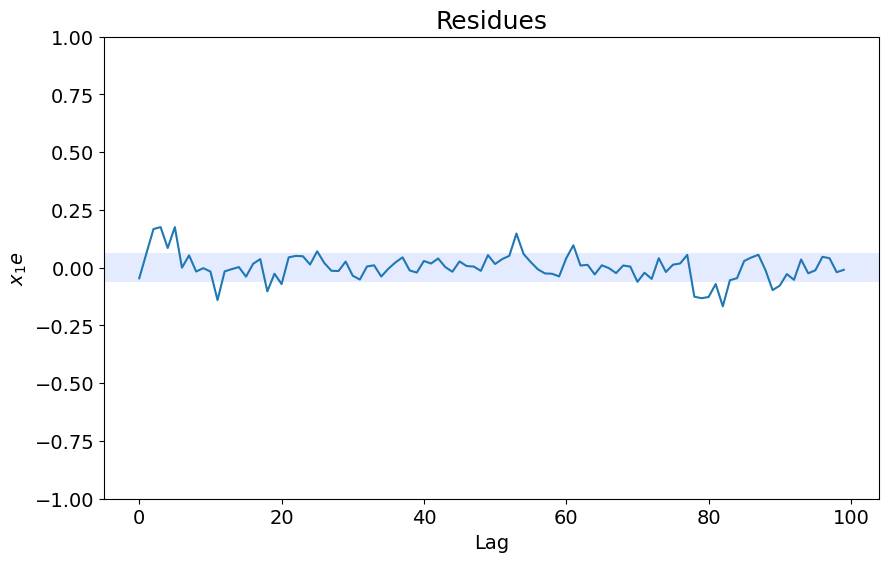

In [6]:
model.fit(X=x_train, y=y_train)
yhat = model.predict(X=x_valid, y=y_valid)
rrse = root_relative_squared_error(y_valid, yhat)
print(rrse)

r = pd.DataFrame(
    results(
        model.final_model,
        model.theta,
        model.err,
        model.n_terms,
        err_precision=8,
        dtype="sci",
    ),
    columns=["Regressors", "Parameters", "ERR"],
)
print(r)

plot_results(y=y_valid, yhat=yhat, n=1000)
ee = compute_residues_autocorrelation(y_valid, yhat)
plot_residues_correlation(data=ee, title="Residues", ylabel="$e^2$")
x1e = compute_cross_correlation(y_valid, yhat, x_valid)
plot_residues_correlation(data=x1e, title="Residues", ylabel="$x_1e$")